In [51]:
# pip install numpy --upgrade

In [52]:
# pip install tensorflow --upgrade

In [53]:
# pip install keras --upgrade

In [1]:
# lstm autoencoder recreate sequence
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [2]:
os.chdir(r'\\usvaprdsas01\rwi\eas\sentier\RX+ data')

In [53]:
df = pd.read_csv('post_meno_patients_research.csv')
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [54]:
df.head()

,patient_id,age,alcohol_consumption,amenorrhea,bc_implant,bc_injection,bc_oral,bc_other,bi_oophorectomy,birth_control,...,oab_incontinence,post_meno,sleep_disturbance,smoker,stress_incontinence,uni_oophorectomy,urge_incontinence,uti,vaginal_dryness,weight_gain
0,615498,57,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,615498,57,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,615498,58,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,615498,58,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,615498,58,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [55]:
df['sym_count']=df.drop(['patient_id','age'],axis=1).sum(1)
df.sym_count.unique()

array([2, 1, 5, 3, 4, 6, 9], dtype=int64)

In [56]:
df.sym_count.unique()

array([2, 1, 5, 3, 4, 6, 9], dtype=int64)

In [57]:
df_1 = df[df['sym_count']>3].drop('sym_count',axis=1)#.patient_id.nunique()

In [58]:
df_1.groupby('patient_id')['patient_id'].transform('count').max()

9

In [59]:
features = 34
t_series = 9
data_lst = []
sz = t_series*34

for ptnt in df_1.patient_id.unique():
    tmp = np.array(df_1[df_1['patient_id']==ptnt].drop('patient_id',axis=1))
    tmp_0 = np.zeros(sz)
    tmp_0[:tmp.size] = tmp.reshape(tmp.size,)
    tmp = tmp_0.reshape(t_series,features).astype(int)
    data_lst.append(tmp)
data_lst = np.array(data_lst).copy()

In [60]:
data_lst.shape

(195, 9, 34)

In [61]:
#data_y.shape,data_x.shape

In [62]:
patients = data_lst.shape[0]
features = data_lst.shape[2]
t_series = data_lst.shape[1]

In [63]:
sequence = np.array(data_lst).reshape((patients, t_series, features))

In [64]:
sequence.shape

(195, 9, 34)

In [65]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(t_series, features),return_sequences=False, name = 'Encoder_1'))
#model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(RepeatVector(t_series, name = 'Repeater_bridge'))
#model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True, name = 'Decoder_1'))
model.add(TimeDistributed(Dense(features),name = 'Time_Distributed'))
model.compile(optimizer='adam', loss='mse')
model.build()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_1 (LSTM)            (None, 50)                17000     
                                                                 
 Repeater_bridge (RepeatVect  (None, 9, 50)            0         
 or)                                                             
                                                                 
 Decoder_1 (LSTM)            (None, 9, 50)             20200     
                                                                 
 Time_Distributed (TimeDistr  (None, 9, 34)            1734      
 ibuted)                                                         
                                                                 
Total params: 38,934
Trainable params: 38,934
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
# fit model
history = model.fit(sequence, sequence, epochs=40)

Epoch 1/40
7/7 [==============================] - 3s 15ms/step - loss: 14.3627
Epoch 2/40
7/7 [==============================] - 0s 17ms/step - loss: 14.1967
Epoch 3/40
7/7 [==============================] - 0s 18ms/step - loss: 13.9913
Epoch 4/40
7/7 [==============================] - 0s 17ms/step - loss: 13.6104
Epoch 5/40
7/7 [==============================] - 0s 19ms/step - loss: 12.8246
Epoch 6/40
7/7 [==============================] - 0s 16ms/step - loss: 11.7211
Epoch 7/40
7/7 [==============================] - 0s 18ms/step - loss: 10.4179
Epoch 8/40
7/7 [==============================] - 0s 20ms/step - loss: 9.1437
Epoch 9/40
7/7 [==============================] - 0s 19ms/step - loss: 7.6295
Epoch 10/40
7/7 [==============================] - 0s 22ms/step - loss: 5.8600
Epoch 11/40
7/7 [==============================] - 0s 28ms/step - loss: 4.1151
Epoch 12/40
7/7 [==============================] - 0s 17ms/step - loss: 3.5027
Epoch 13/40
7/7 [==============================] - 0s 

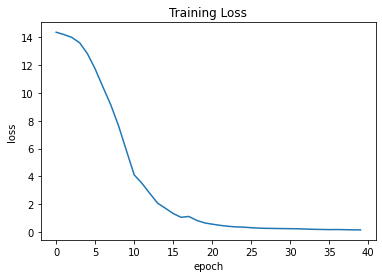

In [67]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
# demonstrate recreation
yhat = model.predict(sequence)
print(yhat[0,0,:])

[ 5.4394398e+01  2.2239047e-01  7.4451372e-02  1.1440407e-01
  1.3356097e-03  1.4820836e-01 -1.4482640e-01 -1.8039029e-02
  2.0229375e-01 -1.8856324e-01  1.5030587e-01  1.6372053e-01
  2.7799323e-01  8.4104814e-02  2.5698406e-01  1.7208761e-01
  1.5937763e-01 -2.3067906e-01 -4.3916225e-02 -2.1308901e-02
  5.4833516e-02  7.2363895e-01 -2.3731330e-01 -1.6847247e-02
  2.7917632e-01  9.7145545e-01  5.6531042e-01  1.1605093e-01
  3.5048372e-01  2.0173559e-02  2.1331263e-01  2.8521818e-01
  1.9054893e-01  3.0798212e-01]


In [69]:
sequence[0,0,:]

array([54,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0])

In [70]:
encoder_layer = Model(inputs=model.inputs, outputs=model.layers[0].output)
encoded_features = np.array(encoder_layer.predict(sequence))

In [71]:
encoded_features.shape

(195, 50)

In [72]:
df_2 = pd.DataFrame(encoded_features)
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.000051,33.753075,0.013599,0.409395,6.748845e-14,19.154661,0.0,1.759043e-07,23.903402,...,0.183480,0.245681,35.017307,0.0,0.437269,18.625256,8.633573,3.142771,4.424978,25.470936
1,0.0,0.000017,37.208939,0.004973,0.406534,1.949168e-15,21.661926,0.0,7.176553e-02,26.225416,...,0.151397,0.200653,37.538280,0.0,0.463639,20.787306,9.992109,3.437285,4.887475,27.738605
2,0.0,0.000046,34.095634,0.017915,0.364721,6.003709e-14,19.277250,0.0,1.912511e-07,23.898794,...,0.183568,0.258462,35.342880,0.0,0.418441,19.080139,8.885135,3.088067,4.351240,25.877357
3,0.0,0.000014,38.281948,0.003375,0.409831,5.697105e-16,22.496206,0.0,9.190366e-02,26.803535,...,0.142429,0.184963,38.417645,0.0,0.462543,21.472607,10.420385,3.534772,5.055397,28.515350
4,0.0,0.000110,31.085737,0.035271,0.391699,1.182366e-12,17.067955,0.0,6.460351e-07,21.935076,...,0.211376,0.293639,32.420475,0.0,0.436863,17.198481,7.590893,2.847111,4.088339,23.395575


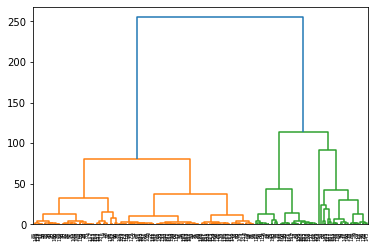

In [73]:
#Plotting Dendograms
import scipy.cluster.hierarchy as shc
plt.figure()
Dendrogram = shc.dendrogram((shc.linkage(df_2, method ='ward')))
plt.show()

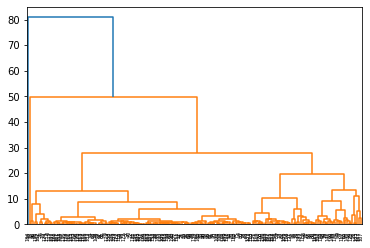

In [74]:
import scipy.cluster.hierarchy as shc
plt.figure()
Dendrogram = shc.dendrogram((shc.linkage(df_2, method ='average')))
plt.show()

In [75]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [76]:
clu_model = AgglomerativeClustering(n_clusters = 4,linkage='ward')
labels = clu_model.fit_predict(df_2)

In [77]:
labels

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int64)

In [78]:
import collections
print(collections.Counter(labels))

Counter({0: 129, 2: 37, 1: 28, 3: 1})


In [79]:
mtrcs = ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock']

In [80]:
for i in mtrcs:
    print(i,"- Silhouette Score:",metrics.silhouette_score(df_2,labels,metric = i))

euclidean - Silhouette Score: 0.6424163
l2 - Silhouette Score: 0.6424163
l1 - Silhouette Score: 0.6579864580376323
manhattan - Silhouette Score: 0.6579864580376323
cityblock - Silhouette Score: 0.6579864580376323


In [81]:
df_labels = pd.DataFrame(df_1['patient_id'].unique(),columns=['patient_id'])
df_labels['labels']=labels
df_labels.head()

,patient_id,labels
0,622135,0
1,1030374,0
2,2065646,0
3,2502591,0
4,2507759,0


In [82]:
df_labels.labels.value_counts()

0    129
2     37
1     28
3      1
Name: labels, dtype: int64

In [83]:
from sklearn.cluster import KMeans

D:\Users\mjichkar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


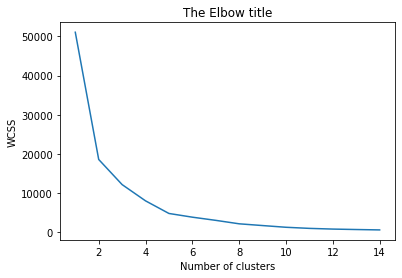

In [84]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(df_2)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
kmeans = KMeans(3)
kmeans.fit(df_2)

KMeans(n_clusters=3)

In [86]:
labels_k = kmeans.fit_predict(df_2)
labels_k

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1,
       0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [87]:
import collections
print(dict(collections.Counter(labels_k)))

{1: 129, 2: 37, 0: 29}


In [88]:
for i in mtrcs:
    print(i,"- Silhouette Score:",metrics.silhouette_score(df_2,labels_k,metric = i))

euclidean - Silhouette Score: 0.63081264
l2 - Silhouette Score: 0.63081264
l1 - Silhouette Score: 0.6472393405230672
manhattan - Silhouette Score: 0.6472393405230672
cityblock - Silhouette Score: 0.6472393405230672


In [89]:
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.000051,33.753075,0.013599,0.409395,6.748845e-14,19.154661,0.0,1.759043e-07,23.903402,...,0.183480,0.245681,35.017307,0.0,0.437269,18.625256,8.633573,3.142771,4.424978,25.470936
1,0.0,0.000017,37.208939,0.004973,0.406534,1.949168e-15,21.661926,0.0,7.176553e-02,26.225416,...,0.151397,0.200653,37.538280,0.0,0.463639,20.787306,9.992109,3.437285,4.887475,27.738605
2,0.0,0.000046,34.095634,0.017915,0.364721,6.003709e-14,19.277250,0.0,1.912511e-07,23.898794,...,0.183568,0.258462,35.342880,0.0,0.418441,19.080139,8.885135,3.088067,4.351240,25.877357
3,0.0,0.000014,38.281948,0.003375,0.409831,5.697105e-16,22.496206,0.0,9.190366e-02,26.803535,...,0.142429,0.184963,38.417645,0.0,0.462543,21.472607,10.420385,3.534772,5.055397,28.515350
4,0.0,0.000110,31.085737,0.035271,0.391699,1.182366e-12,17.067955,0.0,6.460351e-07,21.935076,...,0.211376,0.293639,32.420475,0.0,0.436863,17.198481,7.590893,2.847111,4.088339,23.395575


In [99]:
df_3 = df_1.merge(df_labels,on='patient_id',how = 'inner')
df_3.head()

,patient_id,age,alcohol_consumption,amenorrhea,bc_implant,bc_injection,bc_oral,bc_other,bi_oophorectomy,birth_control,...,post_meno,sleep_disturbance,smoker,stress_incontinence,uni_oophorectomy,urge_incontinence,uti,vaginal_dryness,weight_gain,labels
0,622135,54,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,1030374,59,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,2065646,54,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,2502591,60,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,2507759,50,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [119]:
Cluster_Analysis_allfeatures_df = df_3.groupby('labels').agg('sum').drop(['patient_id','age'],axis=1)

In [120]:
Cluster_Analysis_allfeatures_df

,alcohol_consumption,amenorrhea,bc_implant,bc_injection,bc_oral,bc_other,bi_oophorectomy,birth_control,dec_libido,dry_skin,...,oab_incontinence,post_meno,sleep_disturbance,smoker,stress_incontinence,uni_oophorectomy,urge_incontinence,uti,vaginal_dryness,weight_gain
labels,,,,,,,,,,,,,,,,,,,,,
0,28,0,0,0,9,0,0,9,6,9,...,30,129,34,0,17,0,5,13,26,24
1,25,0,1,0,2,0,0,3,1,1,...,26,93,32,0,15,0,12,2,15,24
2,23,0,0,0,2,0,0,2,0,5,...,16,74,29,0,11,0,7,6,5,18
3,0,0,0,0,0,0,0,0,0,0,...,1,9,1,0,0,0,0,1,0,2


In [122]:
cluster_analysis_df_agg = pd.DataFrame()
for col in Cluster_Analysis_allfeatures_df.columns:
    cluster_analysis_df_agg[col] = np.round(Cluster_Analysis_allfeatures_df[col]*100/Cluster_Analysis_allfeatures_df[col].sum(),2).fillna(0)
cluster_analysis_df_agg

,alcohol_consumption,amenorrhea,bc_implant,bc_injection,bc_oral,bc_other,bi_oophorectomy,birth_control,dec_libido,dry_skin,...,oab_incontinence,post_meno,sleep_disturbance,smoker,stress_incontinence,uni_oophorectomy,urge_incontinence,uti,vaginal_dryness,weight_gain
labels,,,,,,,,,,,,,,,,,,,,,
0,36.84,0.0,0.0,0.0,69.23,0.0,0.0,64.29,85.71,60.00,...,41.10,42.30,35.42,0.0,39.53,0.0,20.83,59.09,56.52,35.29
1,32.89,0.0,100.0,0.0,15.38,0.0,0.0,21.43,14.29,6.67,...,35.62,30.49,33.33,0.0,34.88,0.0,50.00,9.09,32.61,35.29
2,30.26,0.0,0.0,0.0,15.38,0.0,0.0,14.29,0.00,33.33,...,21.92,24.26,30.21,0.0,25.58,0.0,29.17,27.27,10.87,26.47
3,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,1.37,2.95,1.04,0.0,0.00,0.0,0.00,4.55,0.00,2.94


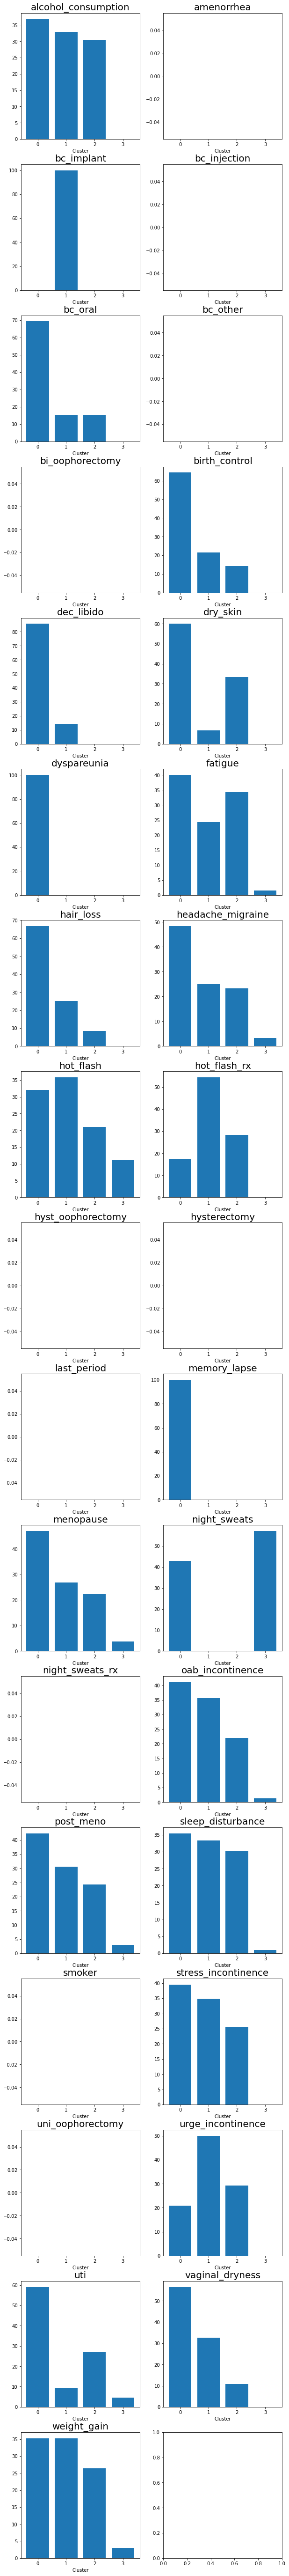

In [128]:
#Cluster Analysis in Graphs with all the features
j, k = 0,0
fig,ax = plt.subplots(17,2,figsize=(10,100))

for i in cluster_analysis_df_agg.columns:
    x = range(0,4)
    y = cluster_analysis_df_agg[i]
    ax[j,k].bar(x,y)
    ax[j,k].set_title(i, fontsize=20)
    ax[j,k].set(xlabel = 'Cluster')
    k+=1   
    if(k==2):
        j+=1
        k=0
        
plt.show()
fig.tight_layout()